In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('data/rails_github_issues_dataset_raw_500.csv')

In [4]:
# Display the first few rows of the DataFrame
df.head()

,number,title,user,labels,created_at,updated_at,closed_at,body
0,50434,Fix: #50293 Bump ActiveSupport::Cache.format_v...,rubyrider,"activesupport, railties",2023-12-24T00:43:36Z,2023-12-24T06:10:32Z,2023-12-24T04:32:08Z,### Motivation / Background\r\nThis pull reque...
1,50433,Add flexibility to argument check in docker en...,motdotla,railties,2023-12-22T23:00:12Z,2023-12-22T23:00:17Z,NaN,This allows prepending commands to `./bin/rail...
2,50432,Document missing `:using` and `:where` options...,fatkodima,activerecord,2023-12-22T22:37:51Z,2023-12-22T22:37:55Z,NaN,Exclusion constraints were added in https://gi...
3,50431,Add `exclusion_constraint_exists?` and `unique...,fatkodima,activerecord,2023-12-22T22:18:21Z,2023-12-22T22:18:45Z,NaN,Exclusion constraints were added in https://gi...
4,50430,Introduce predicate definition when defining s...,stevepolitodesign,"activerecord, docs",2023-12-22T18:05:28Z,2023-12-24T01:55:51Z,NaN,### Motivation / Background\r\n\r\nCreates par...


# How do the number of issues evolve over time?

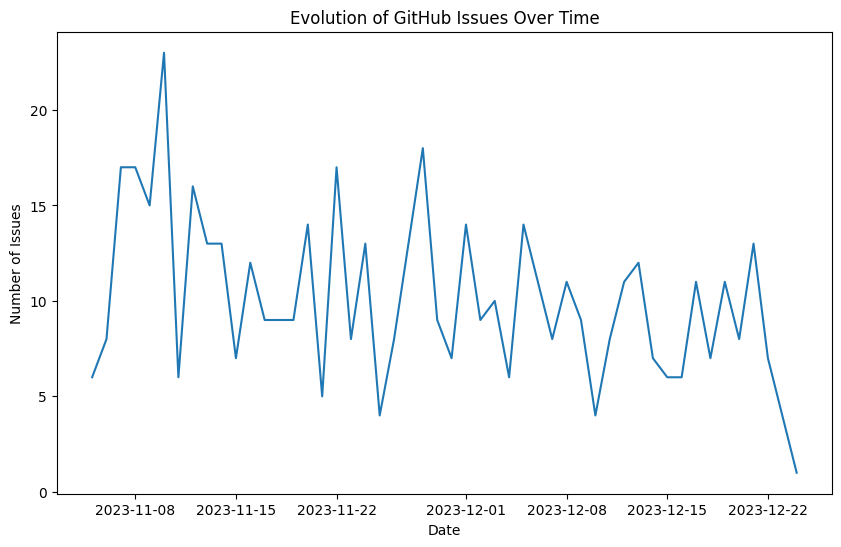

In [5]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['created_at'])

# Group by date and count the number of issues for each date
daily_counts = df.groupby(df['date'].dt.date).size().reset_index(name='issue_count')

# Plot the evolution of the number of issues over time
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['date'], daily_counts['issue_count'])
plt.title('Evolution of GitHub Issues Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.show()

In [6]:
# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

In [7]:
df['date'] = df['created_at'].dt.date
daily_issue_count = df.groupby('date')['number'].count()

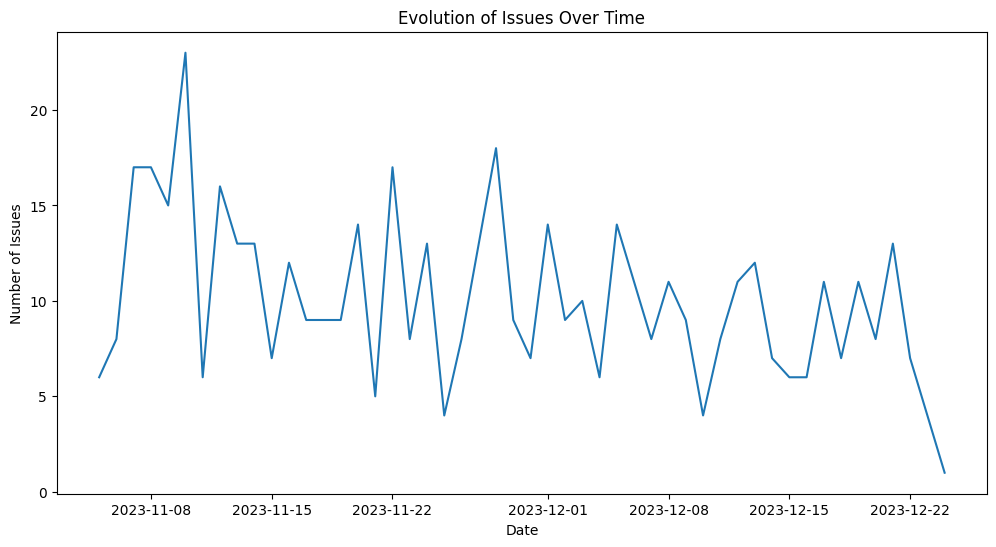

In [9]:
# Plotting the evolution of the number of issues over time
plt.figure(figsize=(12, 6))
daily_issue_count.plot(title='Evolution of Issues Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Issues')
#plt.savefig('plots/issue_evolution_time.png',bbox_inches='tight')
plt.show()

# Are there any periods in which we get more issues?

## Weekly distribution

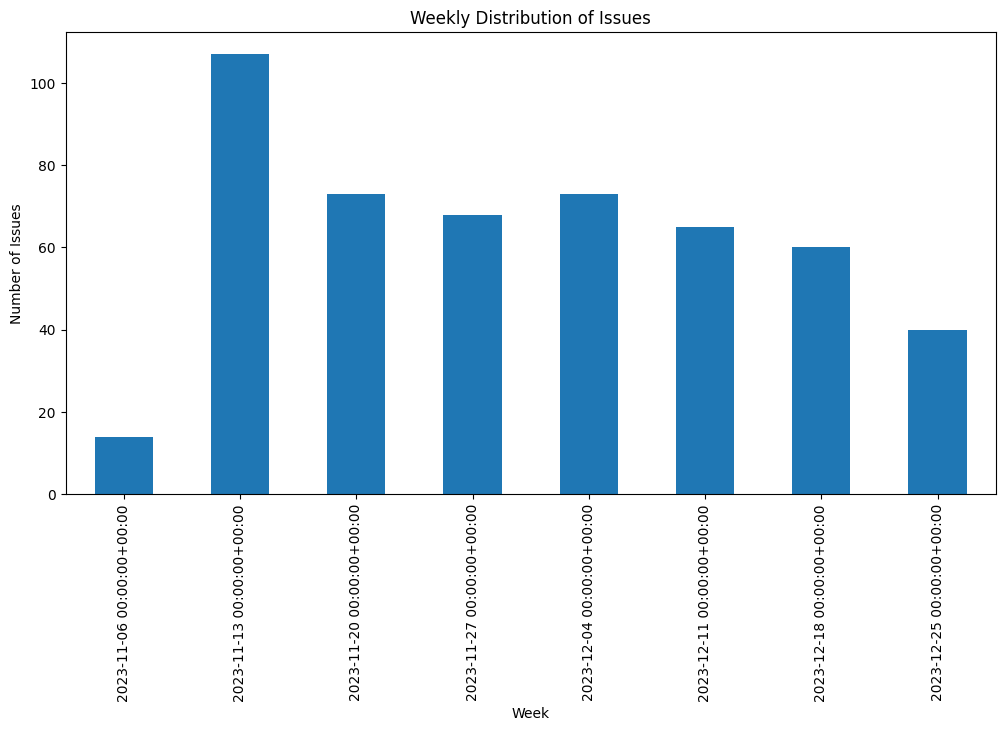

In [10]:
# Weekly distribution
weekly_issue_count = df.resample('W-Mon', on='created_at').size()

# Plotting the weekly distribution of issues
plt.figure(figsize=(12, 6))
weekly_issue_count.plot(kind='bar', title='Weekly Distribution of Issues')
plt.xlabel('Week')
plt.ylabel('Number of Issues')
#plt.savefig('plots/issue_weekly_dist.png',bbox_inches='tight')
plt.show()

## Bi-Weekly distribution

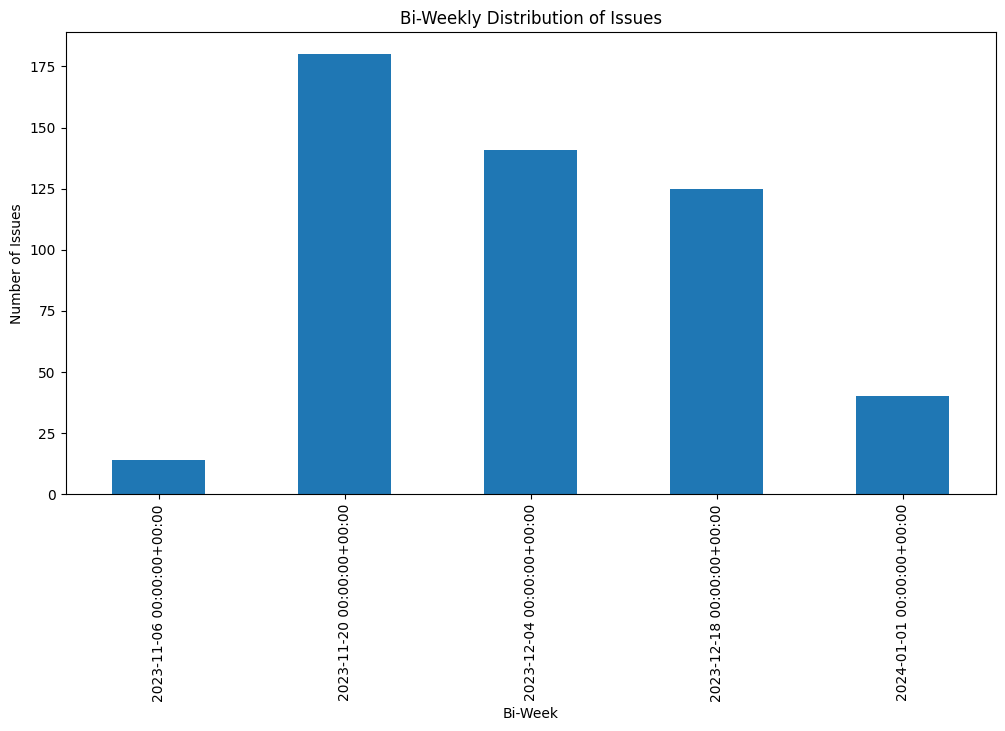

In [11]:
# Bi-weekly distribution
biweekly_issue_count = df.resample('2W-Mon', on='created_at').size()

# Plotting the bi-weekly distribution of issues
plt.figure(figsize=(12, 6))
biweekly_issue_count.plot(kind='bar', title='Bi-Weekly Distribution of Issues')
plt.xlabel('Bi-Week')
plt.ylabel('Number of Issues')
#plt.savefig('plots/issue_bi-weekly_dist.png',bbox_inches='tight')
plt.show()

## Monthly distribution

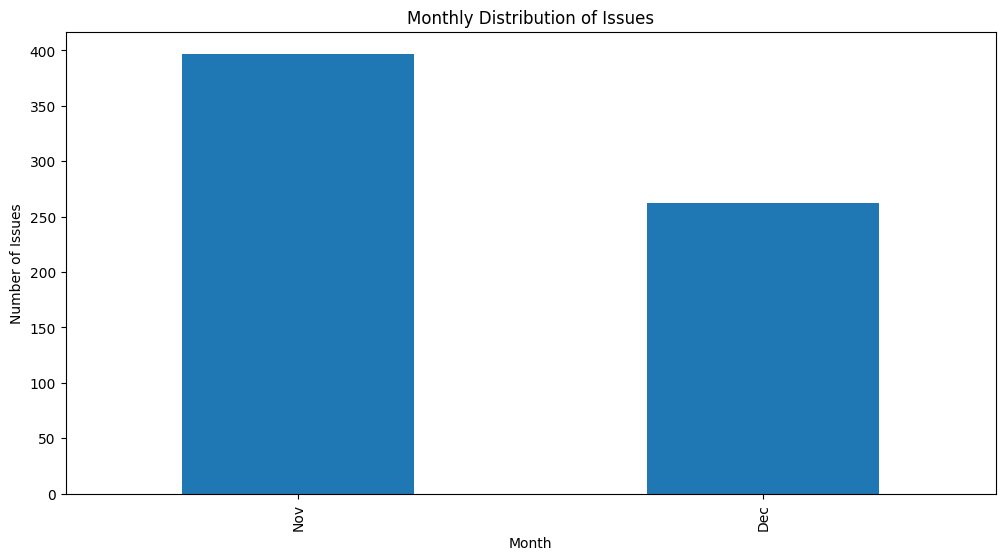

In [19]:
# Monthly distribution
monthly_issue_count = df.resample('M', on='created_at').size()

# Plotting the monthly distribution of issues
plt.figure(figsize=(12, 6))
monthly_issue_count.index = monthly_issue_count.index.strftime('%b')  # Format the month names
monthly_issue_count.plot(kind='bar', title='Monthly Distribution of Issues')
plt.xlabel('Month')
plt.ylabel('Number of Issues')
plt.savefig('plots/raw_issue_monthly_dist.png',bbox_inches='tight')
plt.show()

# Is there anyone who reports more issues than others?

In [13]:
# Is there anyone who reports more issues than others?
top_issue_reporters = df['user'].value_counts().head(10)

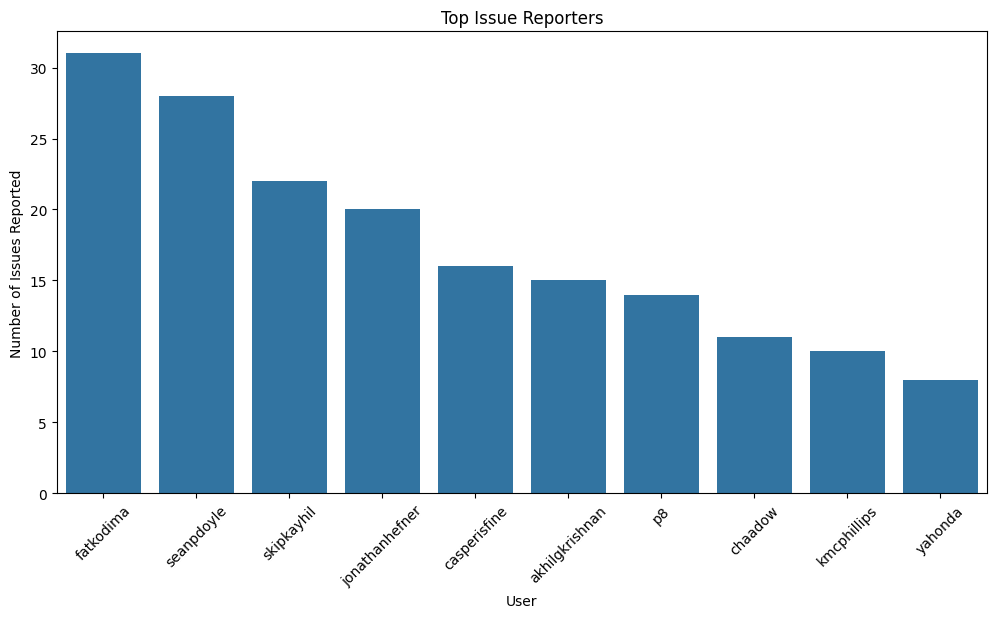

In [20]:
# Plotting the top issue reporters
plt.figure(figsize=(12, 6))
sns.barplot(x=top_issue_reporters.index, y=top_issue_reporters.values)
plt.title('Top Issue Reporters')
plt.xlabel('User')
plt.ylabel('Number of Issues Reported')
plt.xticks(rotation=45)
plt.savefig('plots/raw_top_issue_reporters.png',bbox_inches='tight')
plt.show()

# What is the most popular category (label)?

In [22]:
# What is the most popular category (label)?
label_counts = df['labels'].str.split(',').explode().str.strip().value_counts().head(10)

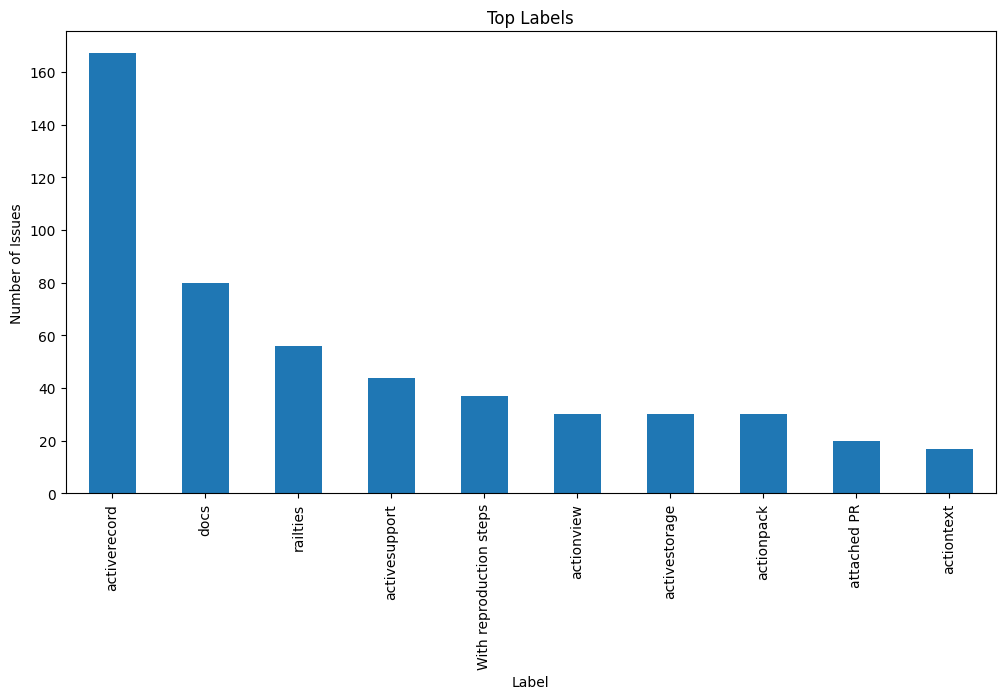

In [23]:
# Plotting the most popular labels
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar', title='Top Labels')
plt.xlabel('Label')
plt.ylabel('Number of Issues')
plt.savefig('plots/raw_top_labels.png',bbox_inches='tight')
plt.show()


Top reporters:
user
fatkodima     31
seanpdoyle    28
Name: count, dtype: int64


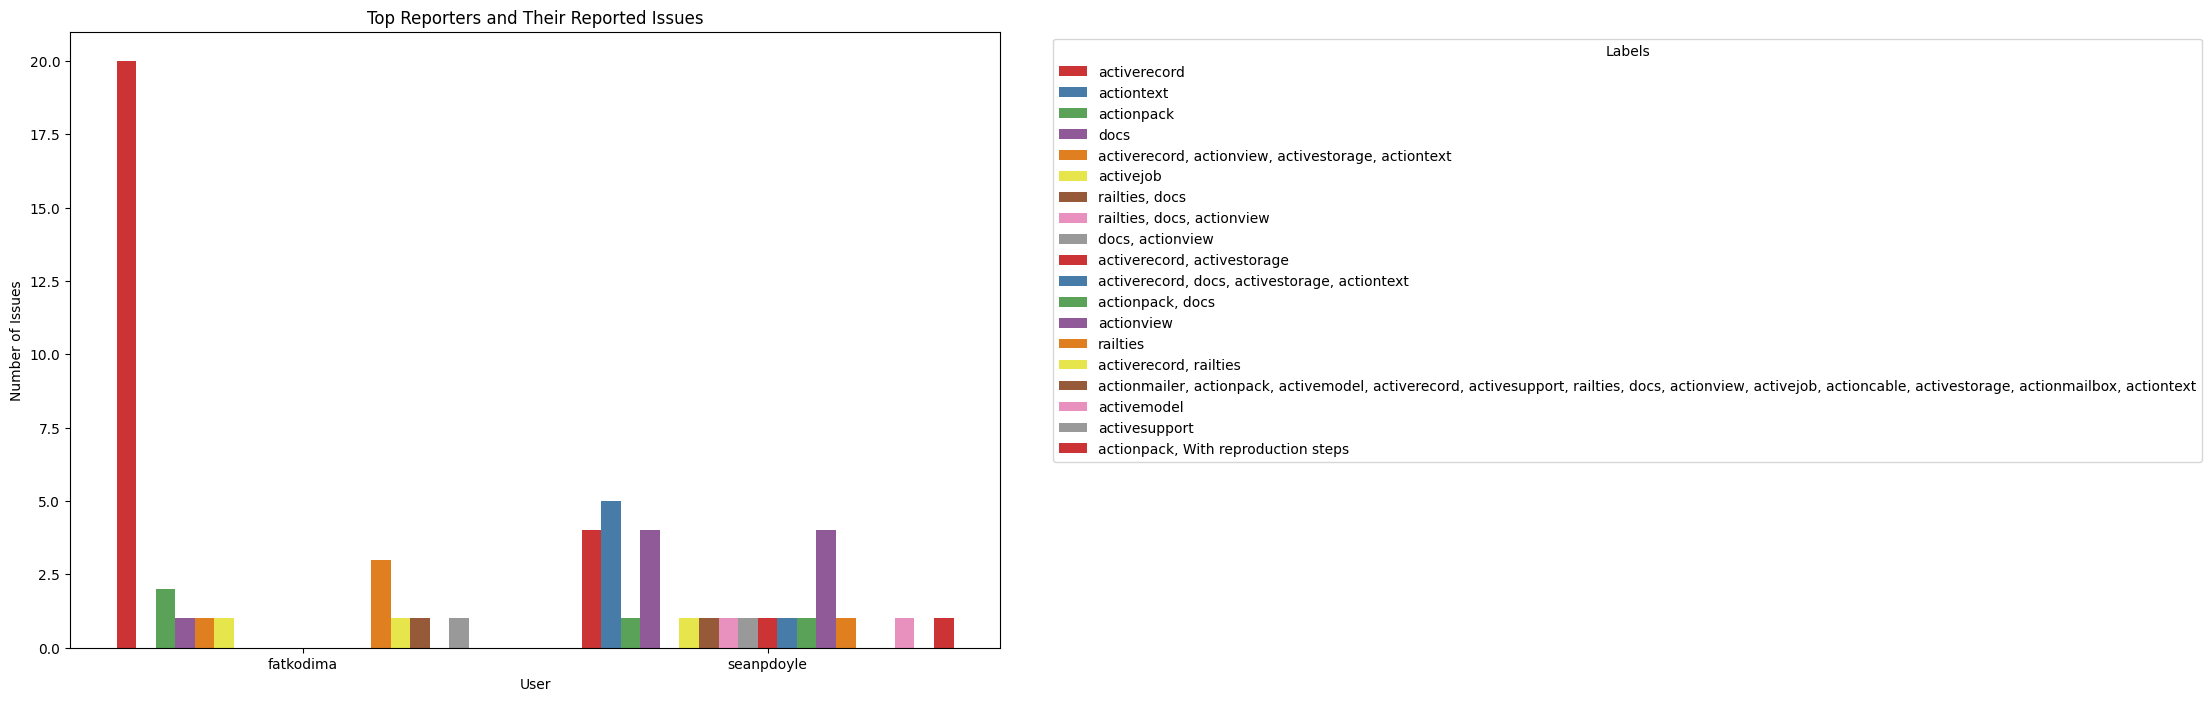

In [17]:
# Is there anyone who reports more issues than others?
top_reporters = df['user'].value_counts().head(2)
print('\nTop reporters:')
print(top_reporters)

# Select data for the top reporters
top_reporters_data = df[df['user'].isin(top_reporters.index)]

# Plot the users with the corresponding labels
plt.figure(figsize=(12, 8))
sns.countplot(data=top_reporters_data, x='user', hue='labels', order=top_reporters.index, palette='Set1')
plt.title('Top Reporters and Their Reported Issues')
plt.xlabel('User')
plt.ylabel('Number of Issues')
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('plots/top_reporters_labels.png',bbox_inches='tight')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_19400\2881216106.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_at'].dt.to_period('M').dt.strftime('%b')


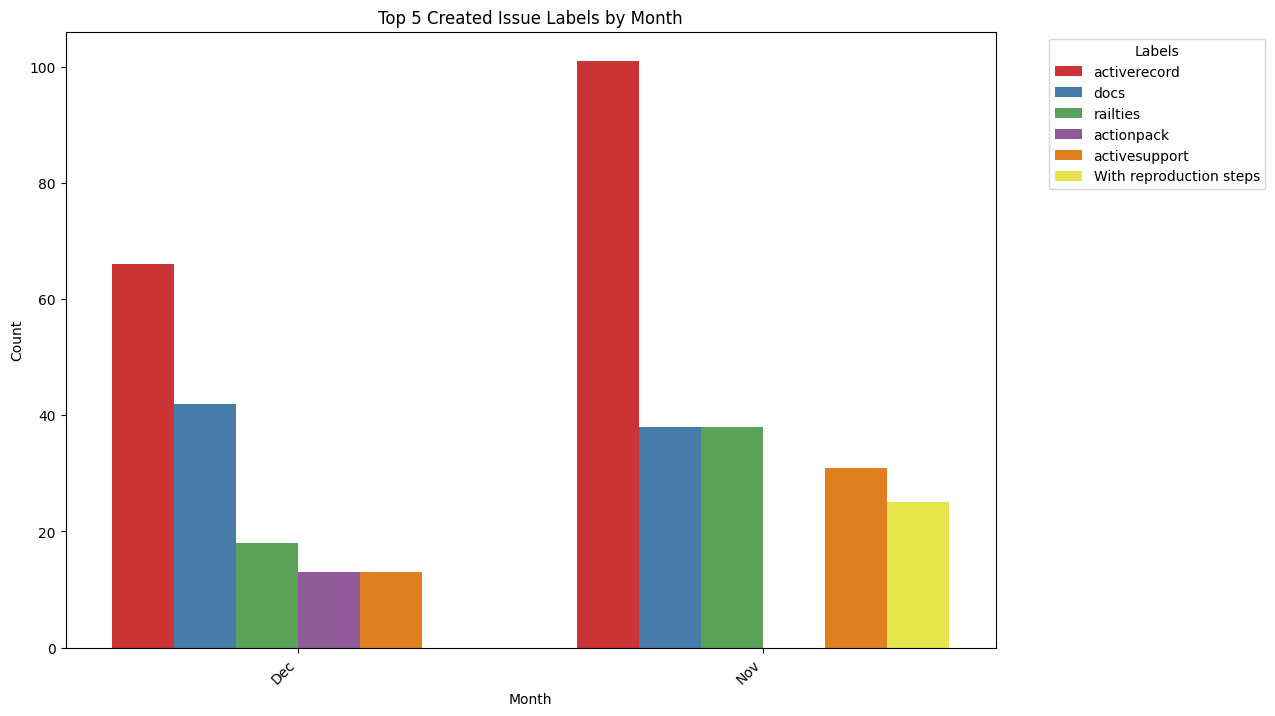

In [18]:
# Convert the 'created_at' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract month from the 'created_at' column
df['month'] = df['created_at'].dt.to_period('M').dt.strftime('%b')

# Split the 'labels' column and explode it to have one label per row
df['labels'] = df['labels'].str.split(', ')
df = df.explode('labels')

# Count the occurrences of each label per month
label_counts = df.groupby(['month', 'labels']).size().reset_index(name='count')

# Find the top 5 created labels for each month
top_labels_per_month = label_counts.groupby('month').apply(lambda x: x.nlargest(5, columns='count')).reset_index(drop=True)

# Plot the top 5 created issue labels by month
plt.figure(figsize=(12, 8))
sns.barplot(data=top_labels_per_month, x='month', y='count', hue='labels', palette='Set1')
plt.title('Top 5 Created Issue Labels by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('plots/top_issue_label_month.png',bbox_inches='tight')
plt.show()